<a href="https://colab.research.google.com/github/kaylaque/baysmile/blob/main/Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature extraction: Bigger Face Cropper


In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Read the input image
img = cv2.imread('crowd.jpg')
  
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)
print(faces)
apaan = []
for (x, y, w, h) in faces:
	cv2.rectangle(img, (x, y), (x+w, y+h),
				(0, 0, 255), 2)
	
	faces = img[y:y + h, x:x + w]
	wh = w*h
	apaan.append(wh)
	plt.imshow(faces)
	cv2.imwrite('face.jpg', faces)

plt.imshow(img)
cv2.imwrite('img.jpg', img)
# cv2.waitKey()


error: ignored

In [ ]:
def detect_faces(inp):
  # face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  # Detect faces
  faces_coord = face_cascade.detectMultiScale(inp, 1.1, 4)
  area = []
  faces = []
  for (x, y, w, h) in faces_coord:
    cv2.rectangle(inp, (x, y), (x+w, y+h), (0, 0, 255), 2)	
    face = inp[y:y + h, x:x + w]
    wh = w*h
    faces.append(face)
    area.append(wh)
  index_max = max(range(len(area)), key=area.__getitem__)
  return faces[index_max]

In [ ]:
# Read the input image
img = cv2.imread('crowd.jpg')
  
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces 
front = detect_faces(gray)
len(front)
# plt.imshow(front)

212

(212, 212, 3)


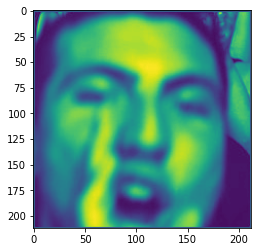

In [ ]:
# Read the input image
img = cv2.imread('face.jpg')
  
# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(gray)

In [ ]:
#get the most center face in picture

CLASS OF...
1. FER2013 (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

#Model Import


In [ ]:
dirr = '/content/savedmodel03'

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
model = load_model(dirr)

In [ ]:
import numpy as np

In [ ]:
# img_path = '/content/drive/MyDrive/PKM/Dataset/Gambar/Testing/Cancer3_Testing.png'
# im = cv2.imread(img_path)   # reads an image in the BGR format
dim = (48, 48)
im = cv2.cvtColor(faces, cv2.COLOR_BGR2GRAY)
im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
# im = im.reshape(None, 48, 48, 3) 
im = np.expand_dims(im, axis=2)
im = np.expand_dims(im, axis=0)
im.shape
print(model.predict(im))

array([[0.3185397 , 0.04293595, 0.23648602, 0.02465782, 0.10184205,
        0.20698906, 0.06854942]], dtype=float32)

In [ ]:
pict = np.zeros((1,48, 48,1))
model.predict(pict).flatten()

array([0.35391048, 0.00629574, 0.07557752, 0.05529219, 0.10313747,
       0.35571855, 0.05006812], dtype=float32)

# Gradio Deployment


In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 21.7 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 2.0 MB 58.2 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 1.1 MB 18.3 MB/s 
     |████████████████████████████████| 256 kB 44.8 MB/s 
     |████████████████████████████████| 212 kB 5.8 MB/s 
     |████████████████████████████████| 84 kB 2.4 MB/s 
     |████████████████████████████████| 144 kB 43.5 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 271 kB 73.7 MB/s 
     |████████████████████████████████| 11.1 MB 52.0 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 856 k

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import gradio as gr
import tensorflow
from tensorflow.keras.models import load_model
# dirr = '/content/drive/MyDrive/Lomba w  DUGIDUDIDAM/LKTI - BAYMAX/codes/savedmodel03'
dirr = '/content/drive/MyDrive/proyek-kuliah/LKTI - BAYMAX/codes/savedmodel03'
model = load_model(dirr)

In [ ]:
labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral","Sad","Surprised"]

def detect_faces(inp):
  # face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt2.xml')
  face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  # Detect faces
  faces_coord = face_cascade.detectMultiScale(inp, 1.1, 4)
  area = []
  faces = []
  for (x, y, w, h) in faces_coord:
    cv2.rectangle(inp, (x, y), (x+w, y+h), (0, 0, 255), 2)	
    face = inp[y:y + h, x:x + w]
    wh = w*h
    faces.append(face)
    area.append(wh)
  index_max = max(range(len(area)), key=area.__getitem__, default = None)
  if index_max == None:
    return np.zeros((48, 48))
  else:
    dim = (48, 48)
    res = cv2.resize(faces[index_max], dim, interpolation = cv2.INTER_AREA)
    return res

def classify_image(inp):
  inp = cv2.cvtColor(inp, cv2.COLOR_BGR2GRAY)
  im = detect_faces(inp)
  im = np.expand_dims(im, axis=2)
  im = np.expand_dims(im, axis=0)
  prediction = model.predict(im).flatten()
  return {labels[i]: float(prediction[i]) for i in range(7)}

image = gr.inputs.Image(shape=(122, 122))
label = gr.outputs.Label(len(labels))

gr.Interface(fn=classify_image, inputs=image, outputs=label, capture_session=True,
             title="BaySmile", description="here is a simple prototype to try the ML's model that will predict your facial expression. The face that predicted is the biggest one. enjoy!").launch(debug=True)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `capture_session` parameter is deprecated, and it has no effect
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://23188.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 256, in run_predict
    fn_index, raw_input, username, session_state
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 544, in process_api
    predictions, duration = await self.call_function(fn_index, processed_input)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 459, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "/usr/local/lib/python3.7/dist-packages/gradio/interface.py", line 509, in <lam